In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from aptos.data_loader import MixupNpyDataset
import torchvision.transforms as T

In [19]:
def noop(x):
    return x

pre_tsfm = T.Compose([
    T.ToPILImage(),
    T.RandomRotation(degrees=180),
])

post_tsfm = T.Compose([
    T.RandomAffine(
        degrees=180,
        translate=(0, 0.05),
        shear=(-0.05, 0.05)
    ),
    T.RandomResizedCrop(256, scale=(0.8, 1), ratio=(0.9, 1.1)),
    T.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2),
    T.ToTensor(),
    T.Normalize(
        [0.485, 0.456, 0.406], 
        [0.229, 0.224, 0.225]
    ),
    T.RandomErasing(
        p=0.8,
        scale=(0.05, 0.15),
        ratio=(0.4, 2.5)
    ),
    T.ToPILImage()
])

ds = MixupNpyDataset('../data/preprocessed', pre_tsfm, post_tsfm)

3.1494832038879395


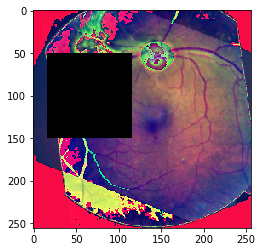

In [20]:
X, y = ds[106]
print(y)
plt.imshow(X)